# Parasite Chain Building

Here I'm going to try and build a parasite chain attack, with only a specific transaction for this first version. A more comprehensive version with adaptability can be developed later.

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

from tangle import Tangle, node_graph, watcher
from PC_classes import mal_node

plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

In [2]:
t = Tangle(rate=3, tip_selection='mcmc', plot=True)
ng = node_graph(t)
w = watcher(t, ng)
for n in range(4):
    ng.new_node()

First node
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x0000026253C5F830>]
Edges []
Node IDS [0]
Weights [[0, 2032, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x0000026253C5F830>, <tangle.node object at 0x000002627319E180>]
Edges [(1, 0)]
Node IDS [0, 1]
Weights [[0, 2032, 1], [1, 729, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x0000026253C5F830>, <tangle.node object at 0x000002627319E180>, <tangle.node object at 0x0000026253C5F560>]
Edges [(1, 0), (2, 1), (2, 0)]
Node IDS [0, 1, 2]
Weights [[0, 2032, 1], [1, 729, 1], [2, 286, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x0000026253C5F830>, <tangle.node object at 0x000002627319E180>, <tangle.node object at 0x0000026253C5F560>, <tangle.node object at 0x0000026253C5F230>]
Edges [(1, 0), (2, 1), (2, 0), (3, 2), (3, 1)]
Node IDS [0, 1, 2, 3]
Weights [[0, 2032, 1], [1, 729, 1], [2, 286, 1], [3, 356, 1]]


Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x0000026253C5F830>, <tangle.node object at 0x000002627319E180>, <tangle.node object at 0x0000026253C5F560>, <tangle.node object at 0x0000026253C5F230>, <tangle.mal_node object at 0x0000026273257560>]
Edges [(1, 0), (2, 1), (2, 0), (3, 2), (3, 1), (4, 0), (4, 2)]
Node IDS [0, 1, 2, 3, 4]
Weights [[0, 2032, 1], [1, 729, 1], [2, 286, 1], [3, 356, 1], [4, 1988, 1]]


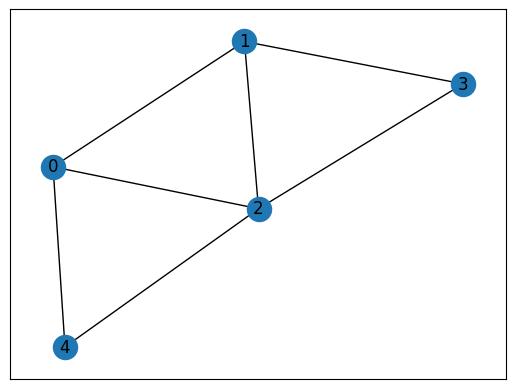

In [3]:
ng.new_node(mal=True, watch=w)

ng.plot_graph()

### Build up a small graph to add the chain to

In [4]:
for j in range(2):
    for i in range(4):
        ng.nodes[i].issue_transaction()
        w.update()

Tips 0 0
2 Genesis Found
------------
Transaction number 1
Transaction Content 29
Node Weight 1
Confirmed Status False
[<Genesis>, <Transaction 1>]
Tips 1 0
Selected Different Transactions
------------
Transaction number 2
Transaction Content 54
Node Weight 1
Confirmed Status False
[<Genesis>, <Transaction 1>, <Transaction 2>]
Tips 1 1
Same non-genesis selected
New Tips 1 2
------------
Transaction number 3
Transaction Content 42
Node Weight 1
Confirmed Status False
[<Genesis>, <Transaction 1>, <Transaction 2>, <Transaction 3>]
Tips 3 2
Selected Different Transactions
------------
Transaction number 4
Transaction Content 85
Node Weight 1
Confirmed Status False
[<Genesis>, <Transaction 1>, <Transaction 2>, <Transaction 3>, <Transaction 4>]
Tips 2 4
Selected Different Transactions
------------
Transaction number 5
Transaction Content 37
Node Weight 1
Confirmed Status False
[<Genesis>, <Transaction 1>, <Transaction 2>, <Transaction 3>, <Transaction 4>, <Transaction 5>]
Tips 3 5
Selected D

Add the bad transaction and spam some tranasactions to make the chain.

In [5]:
ng.nodes[-1].issue_bad_transaction()
w.update()
ng.nodes[-1].spam_transactions(5)

Tips 7 7
Fuck
[<Transaction 1>]
[<Transaction 7>, <Transaction 1>]
Same non-genesis selected
New Tips 7 1
[<Genesis>, <Transaction 1>, <Transaction 2>, <Transaction 3>, <Transaction 4>, <Transaction 5>, <Transaction 6>, <Transaction 7>, <Transaction 8>, <Transaction 9>]
Tips 7
approved <Transaction 9>
approved <Transaction 7>
[<Genesis>, <Transaction 1>, <Transaction 2>, <Transaction 3>, <Transaction 4>, <Transaction 5>, <Transaction 6>, <Transaction 7>, <Transaction 8>, <Transaction 9>, <Transaction 10>]
Tips 7
approved <Transaction 10>
approved <Transaction 7>
[<Genesis>, <Transaction 1>, <Transaction 2>, <Transaction 3>, <Transaction 4>, <Transaction 5>, <Transaction 6>, <Transaction 7>, <Transaction 8>, <Transaction 9>, <Transaction 10>, <Transaction 11>]
Tips 8
approved <Transaction 11>
approved <Transaction 8>
[<Genesis>, <Transaction 1>, <Transaction 2>, <Transaction 3>, <Transaction 4>, <Transaction 5>, <Transaction 6>, <Transaction 7>, <Transaction 8>, <Transaction 9>, <Transa

Make sure the chain is recorded.

In [6]:
badNode = ng.nodes[-1]
print(badNode.chain)

[<Transaction 9>, <Transaction 10>, <Transaction 11>, <Transaction 12>, <Transaction 13>, <Transaction 14>]


Add more nodes after adding the original chain.

In [7]:
for j in range(2):
    for i in range(4):
        ng.nodes[i].issue_transaction()
        w.update()

Tips 8 8
Same non-genesis selected
New Tips 8 13
------------
Transaction number 15
Transaction Content 70
Node Weight 1
Confirmed Status False
[<Genesis>, <Transaction 1>, <Transaction 2>, <Transaction 3>, <Transaction 4>, <Transaction 5>, <Transaction 6>, <Transaction 7>, <Transaction 8>, <Transaction 9>, <Transaction 10>, <Transaction 11>, <Transaction 12>, <Transaction 13>, <Transaction 14>, <Transaction 15>]
Tips 13 13
Same non-genesis selected
New Tips 13 15
------------
Transaction number 16
Transaction Content 84
Node Weight 1
Confirmed Status False
[<Genesis>, <Transaction 1>, <Transaction 2>, <Transaction 3>, <Transaction 4>, <Transaction 5>, <Transaction 6>, <Transaction 7>, <Transaction 8>, <Transaction 9>, <Transaction 10>, <Transaction 11>, <Transaction 12>, <Transaction 13>, <Transaction 14>, <Transaction 15>, <Transaction 16>]
Tips 13 13
Fuck
[<Transaction 1>]
[<Transaction 13>, <Transaction 1>]
Same non-genesis selected
New Tips 13 1
------------
Transaction number 17


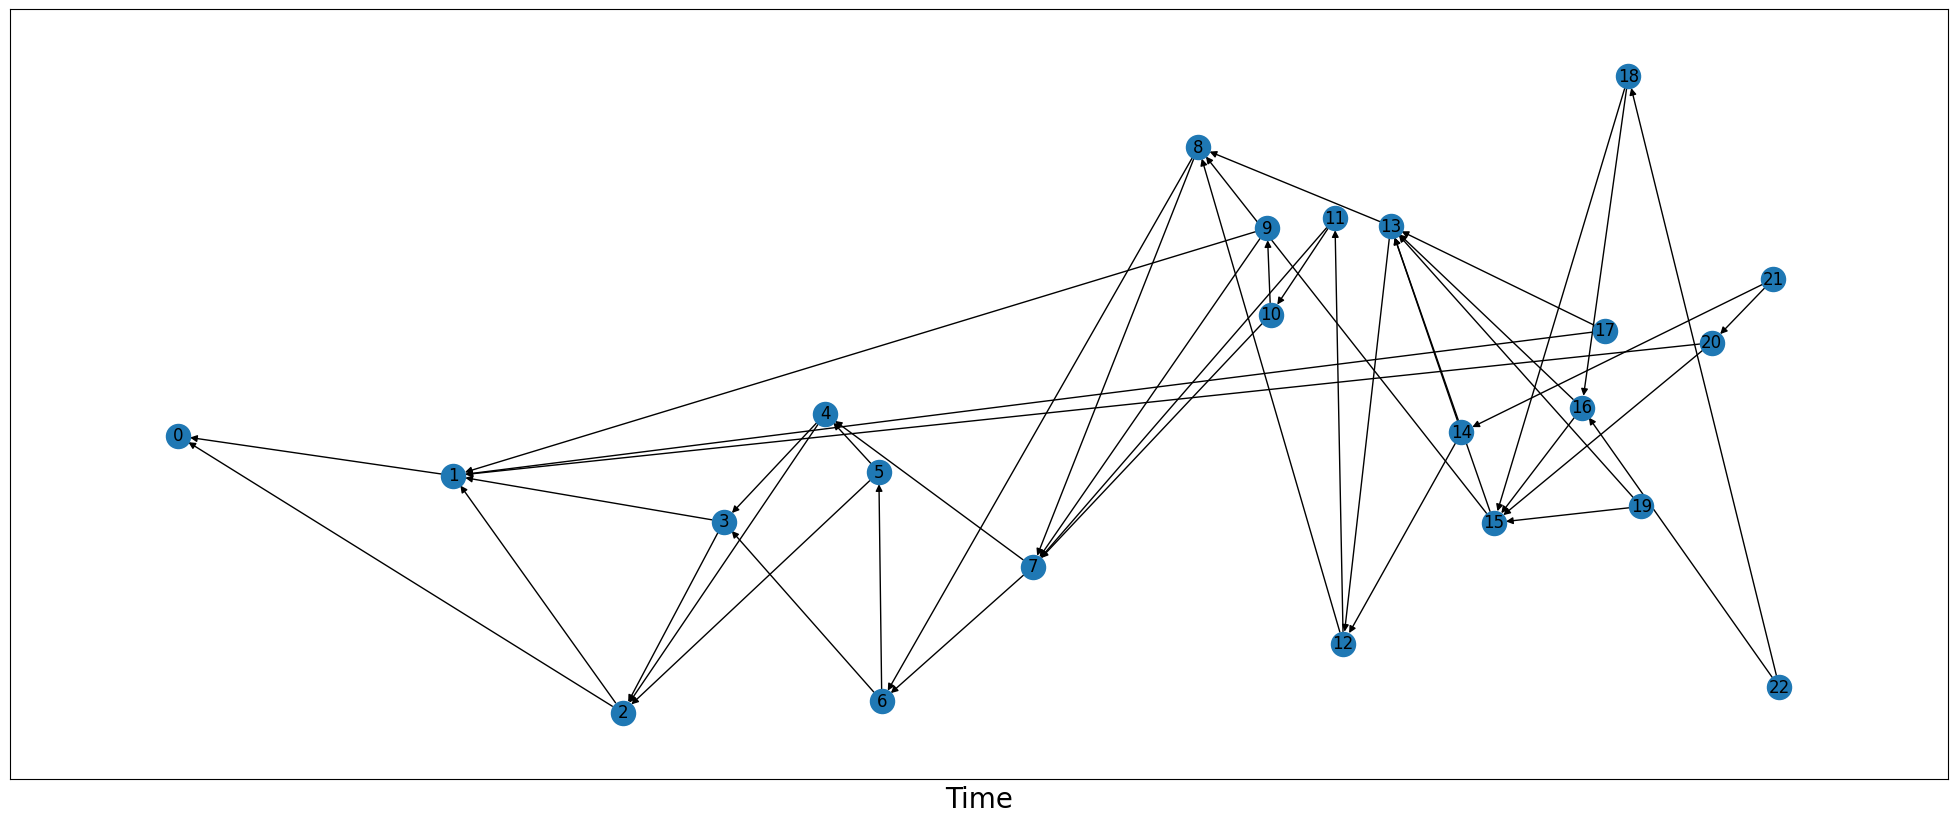

In [8]:
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.figure(figsize=(25, 10))
t.plot()

[1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 4, 4, 6, 6, 6, 6, 8, 11, 12, 12] [1.0, 1.4885368340771685, 2.4034235262841483, 2.9500672138951263, 3.499129153253329, 3.789310503203095, 3.805230733456425, 4.6215420983678275, 5.517515915873083, 5.889420328744895, 5.9079874740252825, 6.255619665224339, 6.300650936926328, 6.557468516940279, 6.940042999428389, 7.1160057961120184, 7.591186206553758, 7.717027060686067, 7.842392487067454, 7.911966089999789, 8.29384404260122, 8.625481358920396, 8.659212886238292]


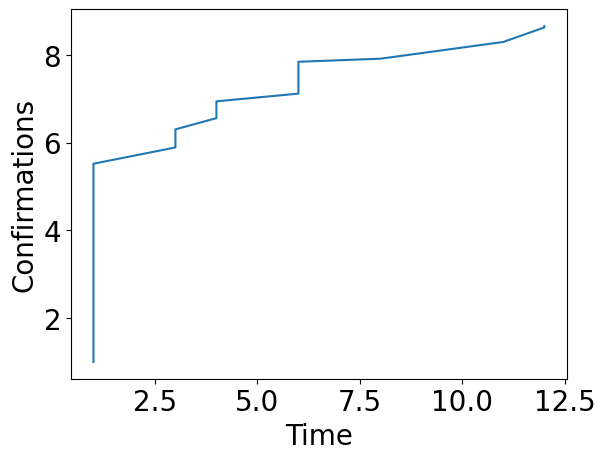

In [9]:
w.plot_confirm_over_time()

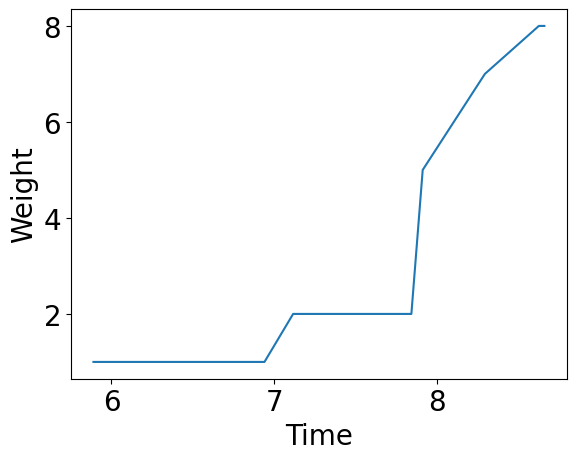

In [10]:
w.plot_PC_cum_weight()